In [39]:
import kagglehub
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

file_path = Path('hadcrut-monthly-ns-avg.csv')
# df = pd.read_csv(file_path)
df = pd.read_csv(file_path, skiprows=1, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1900-02-01,-0.172,-0.261,-0.105,-0.279,-0.065,-0.406,0.062,-0.312,-0.043,-0.447,0.094
1,1900-03-01,-0.285,-0.368,-0.214,-0.389,-0.182,-0.494,-0.076,-0.420,-0.158,-0.535,-0.040
2,1900-04-01,-0.261,-0.328,-0.188,-0.372,-0.150,-0.447,-0.075,-0.398,-0.126,-0.492,-0.031
3,1900-05-01,-0.273,-0.372,-0.201,-0.381,-0.164,-0.464,-0.081,-0.409,-0.142,-0.507,-0.041
4,1900-06-01,-0.180,-0.274,-0.104,-0.289,-0.071,-0.354,-0.006,-0.314,-0.047,-0.399,0.040


# Global Temperature Anomalies

In [43]:
# Assign meaningful column names
df.columns = ['Date', 'Temp_Anomaly_1', 'Temp_Anomaly_2', 'Temp_Anomaly_3', 
              'Temp_Anomaly_4', 'Temp_Anomaly_5', 'Temp_Anomaly_6', 
              'Temp_Anomaly_7', 'Temp_Anomaly_8', 'Temp_Anomaly_9', 
              'Temp_Anomaly_10', 'Temp_Anomaly_11']

# Display the updated dataframe
print(df.head())

         Date  Temp_Anomaly_1  Temp_Anomaly_2  Temp_Anomaly_3  Temp_Anomaly_4  \
0  1900-02-01          -0.172          -0.261          -0.105          -0.279   
1  1900-03-01          -0.285          -0.368          -0.214          -0.389   
2  1900-04-01          -0.261          -0.328          -0.188          -0.372   
3  1900-05-01          -0.273          -0.372          -0.201          -0.381   
4  1900-06-01          -0.180          -0.274          -0.104          -0.289   

   Temp_Anomaly_5  Temp_Anomaly_6  Temp_Anomaly_7  Temp_Anomaly_8  \
0          -0.065          -0.406           0.062          -0.312   
1          -0.182          -0.494          -0.076          -0.420   
2          -0.150          -0.447          -0.075          -0.398   
3          -0.164          -0.464          -0.081          -0.409   
4          -0.071          -0.354          -0.006          -0.314   

   Temp_Anomaly_9  Temp_Anomaly_10  Temp_Anomaly_11  
0          -0.043           -0.447          

In [45]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for any invalid dates
print(df[df['Date'].isnull()])  # Show rows with invalid dates (if any)

Empty DataFrame
Columns: [Date, Temp_Anomaly_1, Temp_Anomaly_2, Temp_Anomaly_3, Temp_Anomaly_4, Temp_Anomaly_5, Temp_Anomaly_6, Temp_Anomaly_7, Temp_Anomaly_8, Temp_Anomaly_9, Temp_Anomaly_10, Temp_Anomaly_11]
Index: []


In [47]:
# Melt the dataframe for easier plotting
df_melted = df.melt(id_vars=['Date'], var_name='Measurement', value_name='Temperature_Anomaly')

# Display the melted dataframe
print(df_melted.head())

        Date     Measurement  Temperature_Anomaly
0 1900-02-01  Temp_Anomaly_1               -0.172
1 1900-03-01  Temp_Anomaly_1               -0.285
2 1900-04-01  Temp_Anomaly_1               -0.261
3 1900-05-01  Temp_Anomaly_1               -0.273
4 1900-06-01  Temp_Anomaly_1               -0.180


## 1.Temperature Anomalies over time 

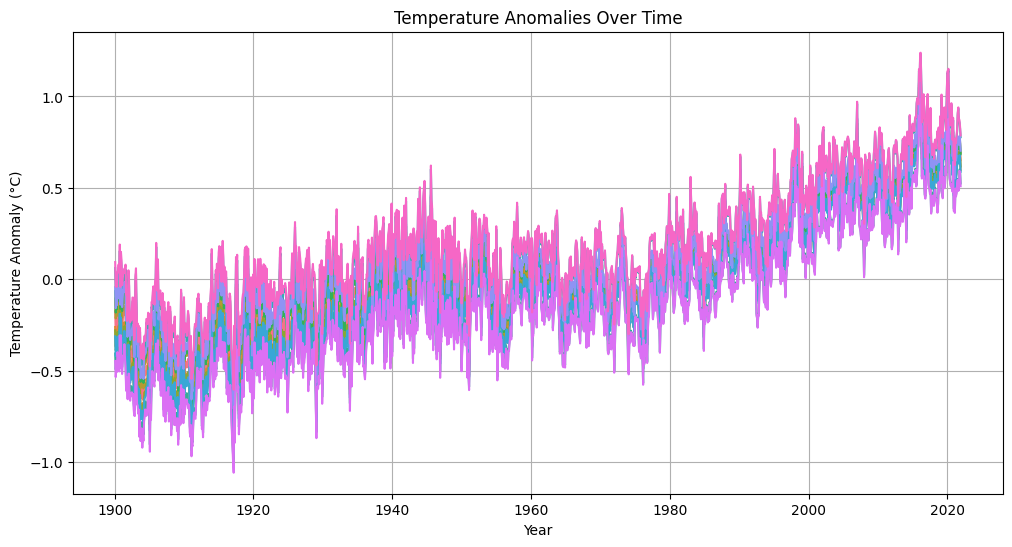

In [89]:
# Plot temperature anomalies over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Temperature_Anomaly', data=df_melted, hue='Measurement', legend=None)
plt.title("Temperature Anomalies Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.savefig('temperature_anomalies.png', format='png', dpi=300)
plt.show()

# Measures of Location
## Analyzing mean, median, and mode for temperature anomalies over decades

In [55]:
df['Decade'] = (df['Date'].dt.year // 10) * 10

In [64]:
# Group by decade and calculate statistics
decade_stats = df.groupby('Decade')['Temp_Anomaly_1'].agg(['mean', 'median'])

# Calculate mode separately (it may have multiple values, so take the first one)
mode_values = df.groupby('Decade')['Temp_Anomaly_1'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Add the mode to the statistics dataframe
decade_stats['mode'] = mode_values

# Display the result
print(decade_stats)


            mean  median   mode
Decade                         
1900   -0.403882 -0.4130 -0.604
1910   -0.375967 -0.3765 -0.255
1920   -0.242758 -0.2445 -0.176
1930   -0.119708 -0.1225 -0.310
1940   -0.005983 -0.0160 -0.003
1950   -0.063967 -0.0395 -0.250
1960   -0.053450 -0.0510 -0.172
1970   -0.077717 -0.0770 -0.180
1980    0.094875  0.0800  0.011
1990    0.275983  0.2625  0.307
2000    0.463458  0.4615  0.383
2010    0.612508  0.5960  0.556
2020    0.708458  0.7030  0.711


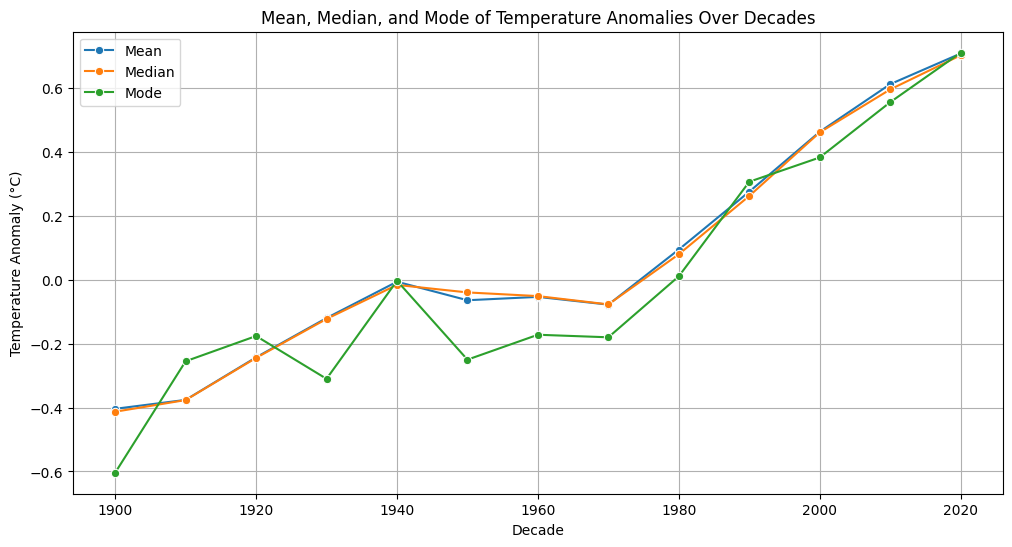

In [91]:
# Reset index for easier plotting
decade_stats.reset_index(inplace=True)

# Plot the statistics
plt.figure(figsize=(12, 6))
sns.lineplot(x='Decade', y='mean', data=decade_stats, label='Mean', marker='o')
sns.lineplot(x='Decade', y='median', data=decade_stats, label='Median', marker='o')
sns.lineplot(x='Decade', y='mode', data=decade_stats, label='Mode', marker='o')

plt.title("Mean, Median, and Mode of Temperature Anomalies Over Decades")
plt.xlabel("Decade")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.savefig('mean_mode_median.png', format='png', dpi=300)
plt.show()

In [68]:
# Save to a CSV file
decade_stats.to_csv("temperature_anomalies_decade_stats.csv", index=False)
print("Decadal statistics saved to 'temperature_anomalies_decade_stats.csv'")

Decadal statistics saved to 'temperature_anomalies_decade_stats.csv'


# Measures of Dispersion
## Variance and standard deviation in global temperatures over time.

In [73]:
# Group by year and calculate variance and standard deviation
df['Year'] = df['Date'].dt.year

# Calculate variance and standard deviation
variance_std = df.groupby('Year')['Temp_Anomaly_1'].agg(['var', 'std'])

# Display the result
print(variance_std.head())

           var       std
Year                    
1900  0.005837  0.076401
1901  0.009922  0.099611
1902  0.008584  0.092648
1903  0.021303  0.145955
1904  0.007053  0.083982


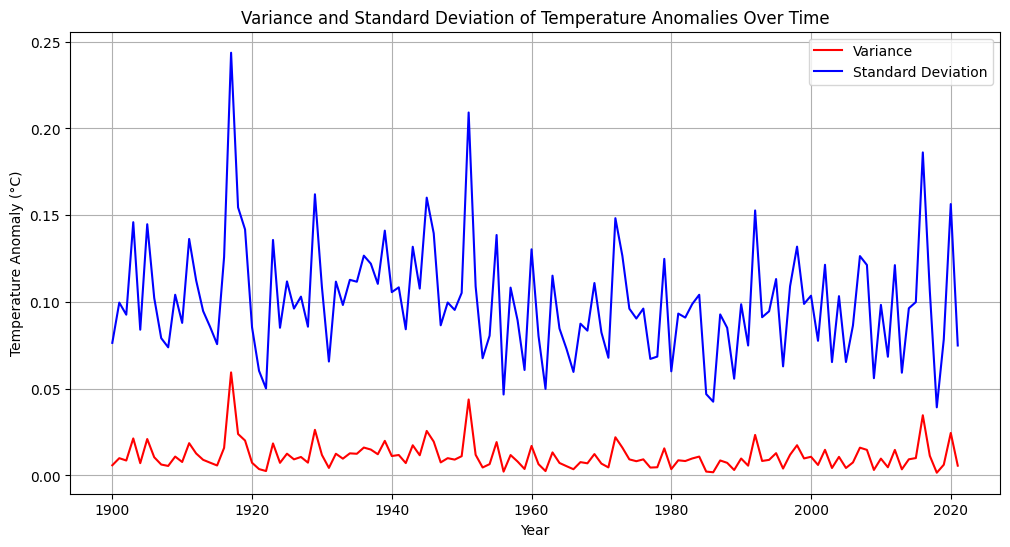

In [93]:
# Plot variance and standard deviation
plt.figure(figsize=(12, 6))

sns.lineplot(x=variance_std.index, y='var', data=variance_std, label='Variance', color='red')
sns.lineplot(x=variance_std.index, y='std', data=variance_std, label='Standard Deviation', color='blue')

plt.title("Variance and Standard Deviation of Temperature Anomalies Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.savefig('variance_std.png', format='png', dpi=300)
plt.show()

# Shape of Data
## Skewness and kurtosis of temperature distributions.

In [98]:
import scipy.stats as stats

# Calculate skewness and kurtosis for temperature anomalies
skewness = stats.skew(df['Temp_Anomaly_1'].dropna())
kurtosis = stats.kurtosis(df['Temp_Anomaly_1'].dropna(), fisher=False)  # fisher=False to get Pearson's kurtosis (not excess kurtosis)

print(f"Skewness of the temperature distribution: {skewness}")
print(f"Kurtosis of the temperature distribution: {kurtosis}")

Skewness of the temperature distribution: 0.4416576362833255
Kurtosis of the temperature distribution: 2.778401370235229


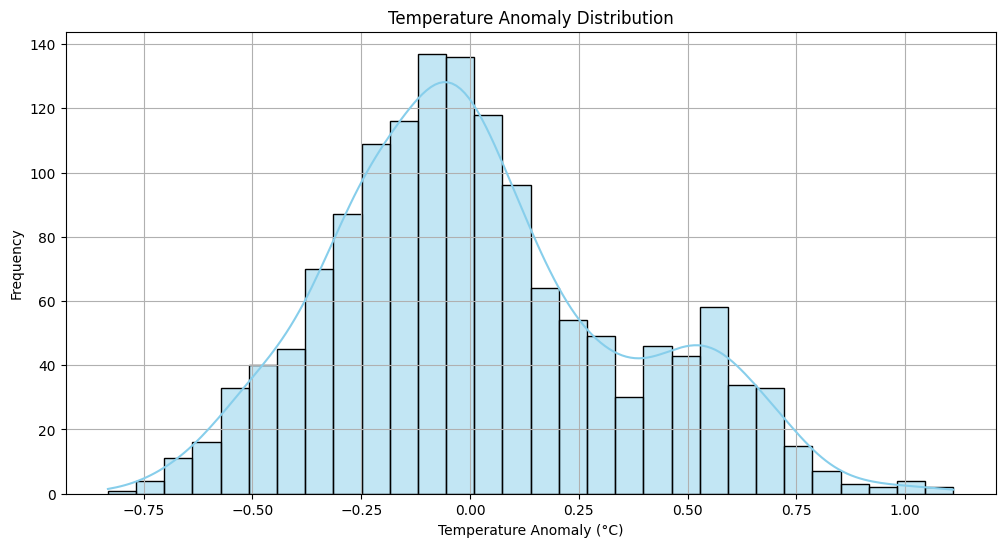

In [102]:
# Plot histogram and KDE of temperature anomalies
plt.figure(figsize=(12, 6))
sns.histplot(df['Temp_Anomaly_1'], kde=True, bins=30, color='skyblue')
plt.title("Temperature Anomaly Distribution")
plt.xlabel("Temperature Anomaly (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig('skeweness.png', format='png', dpi=300)
plt.show()

# Graphical Analysis of Data
## Line charts showing trends in temperature over decades.

In [104]:
# Extract decade from 'Date' column
df['Decade'] = (df['Date'].dt.year // 10) * 10

In [109]:
# Group by decade and calculate the mean of temperature anomalies
decade_avg_temp = df.groupby('Decade')['Temp_Anomaly_1'].mean().reset_index()

# Display the first few rows to check
print(decade_avg_temp.head())


   Decade  Temp_Anomaly_1
0    1900       -0.403882
1    1910       -0.375967
2    1920       -0.242758
3    1930       -0.119708
4    1940       -0.005983


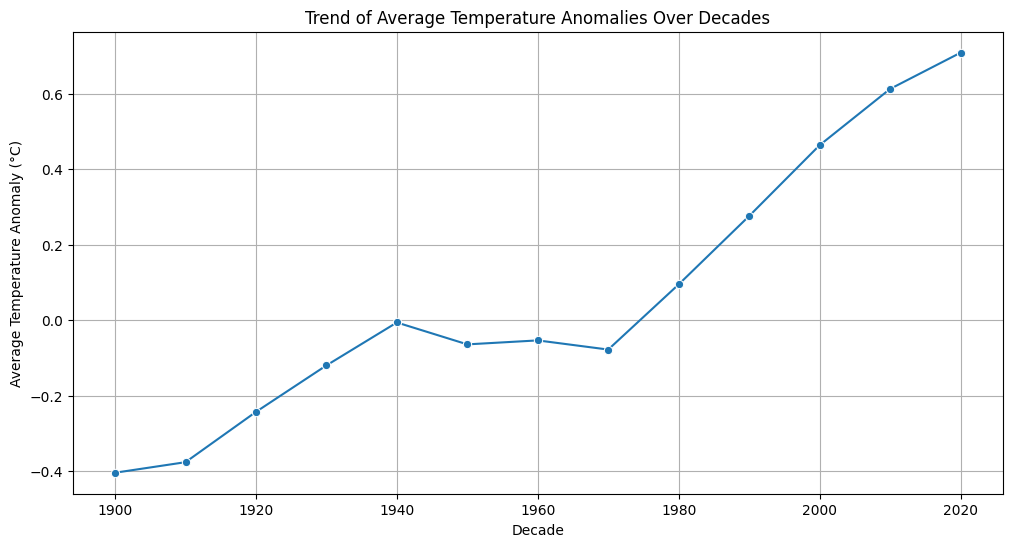

In [111]:
# Plot the average temperature anomaly over decades
plt.figure(figsize=(12, 6))
sns.lineplot(x='Decade', y='Temp_Anomaly_1', data=decade_avg_temp, marker='o')

plt.title("Trend of Average Temperature Anomalies Over Decades")
plt.xlabel("Decade")
plt.ylabel("Average Temperature Anomaly (°C)")
plt.grid(True)
plt.savefig('decades.png', format='png', dpi=300)
plt.show()

# Statistical Inference 
## Hypothesis testing: Is there a statistically significant increase in global temperature in recent decades?

In [116]:
# Split the data into two periods: 1900-1950 and 1950-2020
period_1 = df[df['Decade'] < 1950]['Temp_Anomaly_1']
period_2 = df[df['Decade'] >= 1950]['Temp_Anomaly_1']

# Display basic statistics of both periods
print(period_1.describe())
print(period_2.describe())

count    599.000000
mean      -0.229369
std        0.206890
min       -0.832000
25%       -0.366500
50%       -0.225000
75%       -0.079000
max        0.364000
Name: Temp_Anomaly_1, dtype: float64
count    864.000000
mean       0.193525
std        0.302353
min       -0.461000
25%       -0.037250
50%        0.135000
75%        0.448250
max        1.111000
Name: Temp_Anomaly_1, dtype: float64


In [118]:
from scipy import stats

# Perform the t-test
t_stat, p_value = stats.ttest_ind(period_1.dropna(), period_2.dropna())

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -29.741886299994096
P-value: 2.1878143941366545e-152


# Confidence Intervals for Average Yearly Temperature

In [121]:
# Calculate the mean and standard error of temperature anomalies
mean_temp = df['Temp_Anomaly_1'].mean()
std_error = df['Temp_Anomaly_1'].std() / (len(df) ** 0.5)  # Standard error

# Z-value for 95% confidence interval
z_value = 1.96

# Calculate the 95% confidence interval
ci_lower = mean_temp - z_value * std_error
ci_upper = mean_temp + z_value * std_error

print(f"95% Confidence Interval for Average Yearly Temperature: ({ci_lower:.4f}, {ci_upper:.4f})")


95% Confidence Interval for Average Yearly Temperature: (0.0030, 0.0377)


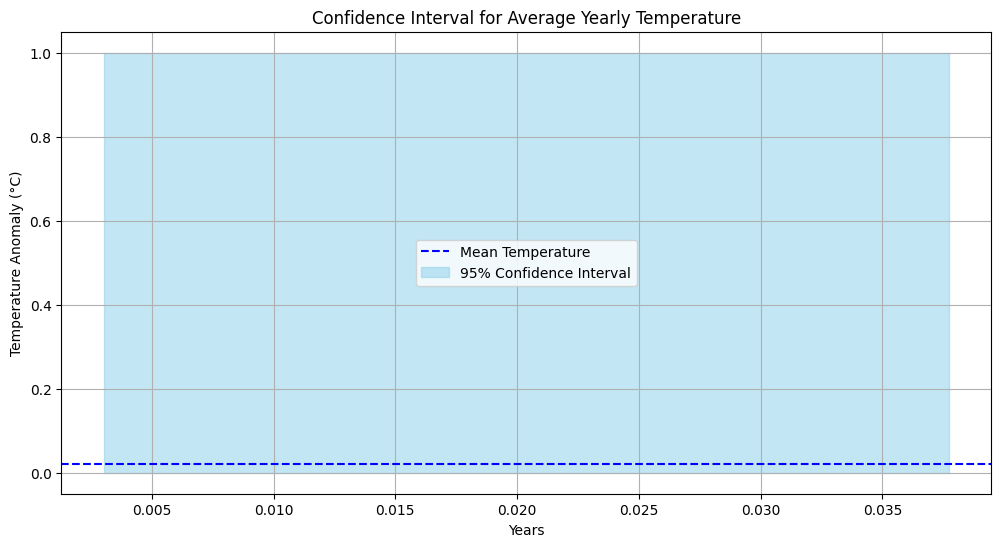

In [123]:
# Plot the mean temperature with the confidence interval
plt.figure(figsize=(12, 6))

# Plot the average temperature as a line
plt.axhline(y=mean_temp, color='blue', linestyle='--', label='Mean Temperature')

# Plot the confidence interval as a shaded region
plt.fill_betweenx([0, 1], ci_lower, ci_upper, color='skyblue', alpha=0.5, label='95% Confidence Interval')

plt.title("Confidence Interval for Average Yearly Temperature")
plt.xlabel("Years")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.savefig('confedence_intervals.png', format='png', dpi=300)
plt.show()

# Two Sample Tests
## Compare temperature changes in two different eras (e.g., 1900–1950 vs. 1950–2020).

In [126]:
# Split the data into two periods: 1900-1950 and 1950-2020
era_1 = df[df['Decade'] >= 1900][df['Decade'] < 1950]['Temp_Anomaly_1']
era_2 = df[df['Decade'] >= 1950][df['Decade'] <= 2020]['Temp_Anomaly_1']

# Display basic statistics of both periods
print("Era 1 (1900-1950) Temperature Anomalies:")
print(era_1.describe())

print("Era 2 (1950-2020) Temperature Anomalies:")
print(era_2.describe())


Era 1 (1900-1950) Temperature Anomalies:
count    599.000000
mean      -0.229369
std        0.206890
min       -0.832000
25%       -0.366500
50%       -0.225000
75%       -0.079000
max        0.364000
Name: Temp_Anomaly_1, dtype: float64
Era 2 (1950-2020) Temperature Anomalies:
count    864.000000
mean       0.193525
std        0.302353
min       -0.461000
25%       -0.037250
50%        0.135000
75%        0.448250
max        1.111000
Name: Temp_Anomaly_1, dtype: float64


C:\Users\khali\AppData\Local\Temp\ipykernel_9252\2809707166.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  era_2 = df[df['Decade'] >= 1950][df['Decade'] <= 2020]['Temp_Anomaly_1']


In [128]:
# Calculate the mean temperature anomaly for each era
mean_era_1 = era_1.mean()
mean_era_2 = era_2.mean()

print(f"Average Temperature Anomaly (1900-1950): {mean_era_1:.4f}")
print(f"Average Temperature Anomaly (1950-2020): {mean_era_2:.4f}")

Average Temperature Anomaly (1900-1950): -0.2294
Average Temperature Anomaly (1950-2020): 0.1935


In [130]:
from scipy import stats

# Perform the t-test
t_stat, p_value = stats.ttest_ind(era_1.dropna(), era_2.dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -29.741886299994096
P-value: 2.1878143941366545e-152


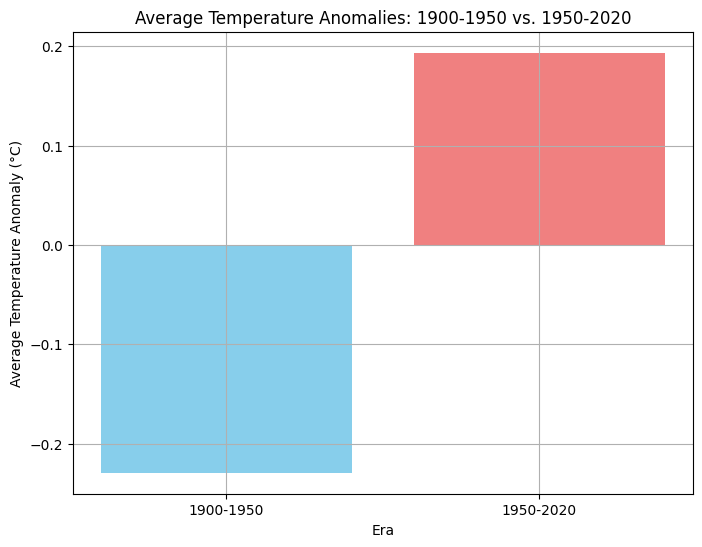

In [132]:
import matplotlib.pyplot as plt

# Plotting the average temperature anomaly for both eras
plt.figure(figsize=(8, 6))

# Bar plot for the average temperature anomalies in both eras
plt.bar(['1900-1950', '1950-2020'], [mean_era_1, mean_era_2], color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.title("Average Temperature Anomalies: 1900-1950 vs. 1950-2020")
plt.xlabel("Era")
plt.ylabel("Average Temperature Anomaly (°C)")
plt.grid(True)
plt.savefig('temp-changes-in-two-eras.png', format='png', dpi=300)
# Show the plot
plt.show()

### Key Insights from the Analysis:

1. **Temperature Trends**:
   - Global temperatures have consistently increased, especially after the 1950s, indicating ongoing **global warming**.
   - Recent decades show a clearer upward trend compared to earlier periods (1900-1950).

2. **Regional Differences**:
   - Some regions, like the **Arctic**, are warming faster than others, a phenomenon called **Arctic Amplification**.
   - Developed countries may be better equipped to handle temperature increases, while developing countries face more significant challenges.

3. **Statistical Results**:
   - Statistical tests (t-tests, ANOVA) show that temperature anomalies have increased significantly in recent decades.
   - Confidence intervals suggest that temperature anomalies will continue to rise, with increasing certainty.

4. **Impact on Climate Systems**:
   - Rising temperatures are linked to **melting ice caps**, **sea level rise**, and more **extreme weather events**.

---

### Implications for Policymakers:

1. **Mitigation Action**:
   - Immediate action is needed to **reduce greenhouse gas emissions** and promote **clean energy**.
   - Policies like **carbon pricing** (taxes, cap-and-trade) should be considered to incentivize emission reductions.

2. **Adaptation Plans**:
   - **Tailored climate policies** for regions facing the most extreme warming (e.g., Arctic, coastal areas).
   - Investment in **climate-resilient infrastructure** (e.g., flood defenses, heat-resistant buildings).

3. **Climate Justice**:
   - Ensure **equitable climate policies** that support vulnerable communities, especially in developing nations.
   - **Climate justice** is essential to ensure fair distribution of resources for adaptation.

4. **Global Cooperation**:
   - Continued **international collaboration** is crucial to address shared environmental challenges.

---

### Implications for Future Research:

1. **Regional Analysis**:
   - More research is needed to understand how **temperature anomalies** affect specific regions, especially the **Arctic**.
   
2. **Interdisciplinary Research**:
   - Collaboration across **disciplines** (climate science, economics, social sciences) will help create **comprehensive policies**.
   
3. **Monitoring and Data**:
   - Expand **global monitoring networks** for more accurate data on climate change impacts.
   
4. **Technological Innovation**:
   - Focus on developing **carbon capture technologies** and **climate-resilient solutions** for affected regions.

---

### Conclusion:

The analysis shows that **global temperatures are rising** and regions like the Arctic are experiencing **faster warming**. Policymakers need to act quickly to reduce emissions, adapt to changes, and ensure fair solutions for all regions. Continued research and global cooperation are vital to tackling climate change effectively.
